In [1003]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import  matplotlib
web=pd.read_parquet('navegacion_web.pq', engine='pyarrow')

In [1005]:
web = pd.read_parquet('navegacion_web.pq', engine='pyarrow')
web.head()

,user_id,device_id,session_id,device_model,min_session_time,total_previous_sessions,total_previous_events,date_short,total_previous_vipphoto_selected,total_previous_vip360view_selected,...,region,time_on_screen_prev,min_total_sessions_prev,all_total_sessions_prev,total_sessions_prev,stock_id,date,user_with_reserve,reserved,avg_time_previous_sessions
51760,9015447,yWOTGT6B-WzQU514Cqx1gL,1644253316189,Android,2022-02-07 17:01:56.223,1,1,2022-01-01 00:11:51.858,0,0,...,Mexico City,0.0,0,0,1,NaN,NaT,0.0,0.0,0.0
14885,8820027,LP42_fstvBPogWjh_1bkCg,1642913715699,Android,2022-01-23 04:55:17.124,1,9,2022-01-01 00:17:23.169,0,0,...,Mexico City,286.0,1,1,2,NaN,NaT,0.0,0.0,143.0
3992,5510567,AKERRpRODjl02b39AjfNb8,1642459615372,Android,2022-01-17 22:46:55.395,1,1,2022-01-01 00:22:28.720,0,0,...,Mexico City,0.0,0,0,1,NaN,NaT,0.0,0.0,0.0
131349,8665203,SxeKxvgE3mkec-e21Ej-bm,1647229337062,Android,2022-03-14 03:42:17.095,1,9,2022-01-01 00:27:00.994,0,0,...,Mexico City,379.0,1,1,2,NaN,NaT,0.0,0.0,189.5
25970,8409083,CttzrxBwYiDT93zwK93Xmt,1643398529809,Android,2022-01-28 19:35:32.308,1,1,2022-01-01 00:28:48.352,0,0,...,México,0.0,0,0,1,NaN,NaT,0.0,0.0,0.0


# Glosario



**user_id**=id del usuario
**device_id**= id del dispositivo
**min_session_time** = fecha de la primera sesión
**total_sessions_prev**= numero de sesion
**total_previous_events**= cantidad de eventos en esta sesión
**date_short**= descartada
    **total_previous_vipphoto_selected**=filtro del auto(evento)
    **total_previous_catalogfilter_selected**= filtro del auto (evento)
    **total_previous_vip_viewed**=filtro del auto (evento)
    **total_previous_cataloglist_viewed**=filtro del auto (evento)
    **total_previous_year_selected**=filtro del auto (evento)
    **-total_previous_make_selected**=filtro del auto (evento)
    **total_previous_model_selected**=filtro del auto (evento)
    **total_previous_version_selected**=filtro del auto (evento)
    **total_previous_mileage_selected**=filtro del auto (evento)
    **total_previous_location_selected**=filtro del auto (evento)
    **total_previous_color_selected**=filtro del auto (evento)
**all_total_sessions_prev** cantidad de sesiones acumulados
**total_previous_sessions** cantidad de sesiones acumuladas
**all_total_previous_sessions**
**stock_id**= id del sutp reservado
**date**= fecha de reserva
**user_with_reserve** = si reservo o no
**reserved** = si reservo o no
**avg_time_previous_sessions** = tiempo promedio en la pagina , medido en segundos
**city**= cuidad de mexico
**region**=  region de mexico
**time_on_screen_prev**=  durecion en segundos de la sesion
La columna total events muestra el total de todos los eventos de la session, los cuales no se muestran todos en este dataset.


#Transformación de datos

In [1006]:
print(f" El dataset muestra la actividad de los usuarios en la pagina web de KAVAK.Cuenta con  {web.shape[0]} sessiones en la web y {web.shape[1]} columnas que describen las acciones de dichos usuarios ")

 El dataset muestra la actividad de los usuarios en la pagina web de KAVAK.Cuenta con  214160 sessiones en la web y 32 columnas que describen las acciones de dichos usuarios 


In [1007]:
web.dtypes

user_id                                           int64
device_id                                        object
session_id                                       object
device_model                                   category
min_session_time                         datetime64[ns]
total_previous_sessions                           int64
total_previous_events                             int64
date_short                               datetime64[ns]
total_previous_vipphoto_selected                  int64
total_previous_vip360view_selected                int64
total_previous_catalogfilter_selected             int64
total_previous_vip_viewed                         int64
total_previous_cataloglist_viewed                 int64
total_previous_home_viewed                        int64
total_previous_year_selected                      int64
total_previous_make_selected                      int64
total_previous_model_selected                     int64
total_previous_version_selected                 

In [1008]:
web.device_id.astype(object)

51760                    yWOTGT6B-WzQU514Cqx1gL
14885                    LP42_fstvBPogWjh_1bkCg
3992                     AKERRpRODjl02b39AjfNb8
131349                   SxeKxvgE3mkec-e21Ej-bm
25970                    CttzrxBwYiDT93zwK93Xmt
                          ...                  
214144                   ITao0pyc-03mus8Rf9JcN5
214111     2e8d803d-822f-400c-9338-99a57ca8de9e
214150     1869c436-faaf-41ee-aa01-fb7c31b80954
214142    2e357941-9c2d-49b3-86a5-0799d80a7913R
214156     1aad33ac-8e00-4f1a-abf7-5ec15d537706
Name: device_id, Length: 214160, dtype: object

### Datos Faltantes

In [1009]:
def percentageOfnull(df):
    nan_count = df.isna().sum().sort_values(ascending=False)
    nan_percentage = ((df.isna().sum()/df.isna().count())*100).round().sort_values(ascending=False)
    train_test_dtype = df.dtypes
    df_info = pd.concat([nan_count,nan_percentage,train_test_dtype],axis=1,keys=['Null Count','Null Percentage','DataTypes'])
    return df_info[df_info['Null Count']>0]

In [1010]:
percentageOfnull(web)

,Null Count,Null Percentage,DataTypes
date,195997,92.0,datetime64[ns]
stock_id,195997,92.0,float64
city,12816,6.0,category


Hay solo 3 columnas con datos nulos.  Las columnas de Date y Stock id tienen la misma cantidad de nulos, ¿Tendran una relación?
La columna de city tiene solo 6% de datos nulos por lo que decido reemplazarla por la moda

In [1011]:
web['city'].fillna(web['city'].mode()[0], inplace = True)

In [1012]:
date_null=web.date.isna()
stock_id_null= web.stock_id.isna()
web[date_null != stock_id_null]

,user_id,device_id,session_id,device_model,min_session_time,total_previous_sessions,total_previous_events,date_short,total_previous_vipphoto_selected,total_previous_vip360view_selected,...,region,time_on_screen_prev,min_total_sessions_prev,all_total_sessions_prev,total_sessions_prev,stock_id,date,user_with_reserve,reserved,avg_time_previous_sessions


In [1013]:
web.loc[web.reserved==1].isnull().sum()

user_id                                  0
device_id                                0
session_id                               0
device_model                             0
min_session_time                         0
total_previous_sessions                  0
total_previous_events                    0
date_short                               0
total_previous_vipphoto_selected         0
total_previous_vip360view_selected       0
total_previous_catalogfilter_selected    0
total_previous_vip_viewed                0
total_previous_cataloglist_viewed        0
total_previous_home_viewed               0
total_previous_year_selected             0
total_previous_make_selected             0
total_previous_model_selected            0
total_previous_version_selected          0
total_previous_mileage_selected          0
total_previous_location_selected         0
total_previous_color_selected            0
city                                     0
region                                   0
time_on_scr

Los nulos de las columnas date y stock_id son los mismos y coiciden con todos los registros cuya reserva es 0.Por lo cual, podemos asumir que  date es la fecha de reserva y el stock id es el auto que el usuario reservó.

In [1014]:
web.loc[(web.user_id==3602521) & ( web.reserved==1),['reserved','stock_id','date']]

,reserved,stock_id,date
18309,1.0,122184.0,2022-02-02
18327,1.0,122184.0,2022-02-02
18661,1.0,122184.0,2022-02-02
18509,1.0,122184.0,2022-02-02
18682,1.0,122184.0,2022-02-02
18813,1.0,122184.0,2022-02-02
19072,1.0,122184.0,2022-02-02
18981,1.0,122184.0,2022-02-02
31635,1.0,122184.0,2022-02-02
31214,1.0,122184.0,2022-02-02


Analizando el usuario 360521, descubrí que reservo en 14 sesiones y 2 autos distintos Ademas, las 14 sesiones suceden dentro de un rango de 2 días. Por lo tanto, estas dos columnas no van a ser tenidas en cuenta para el analisis

In [1015]:
web= web.drop(['date','stock_id'],axis=1)

### Ajuste de las columnas

In [1016]:
web[web.user_with_reserve!=web.reserved]

,user_id,device_id,session_id,device_model,min_session_time,total_previous_sessions,total_previous_events,date_short,total_previous_vipphoto_selected,total_previous_vip360view_selected,...,total_previous_color_selected,city,region,time_on_screen_prev,min_total_sessions_prev,all_total_sessions_prev,total_sessions_prev,user_with_reserve,reserved,avg_time_previous_sessions


In [1017]:

web=web.drop('user_with_reserve',axis=1)

dado que son iguales, borro una de las dos

In [1018]:

def normalize(df):
  df.columns = df.columns.str.replace("_previous","")
normalize(web)
web

,user_id,device_id,session_id,device_model,min_session_time,total_sessions,total_events,date_short,total_vipphoto_selected,total_vip360view_selected,...,total_location_selected,total_color_selected,city,region,time_on_screen_prev,min_total_sessions_prev,all_total_sessions_prev,total_sessions_prev,reserved,avg_time_sessions
51760,9015447,yWOTGT6B-WzQU514Cqx1gL,1644253316189,Android,2022-02-07 17:01:56.223,1,1,2022-01-01 00:11:51.858,0,0,...,0,0,Mexico City,Mexico City,0.0,0,0,1,0.0,0.000000
14885,8820027,LP42_fstvBPogWjh_1bkCg,1642913715699,Android,2022-01-23 04:55:17.124,1,9,2022-01-01 00:17:23.169,0,0,...,0,0,Iztapalapa,Mexico City,286.0,1,1,2,0.0,143.000000
3992,5510567,AKERRpRODjl02b39AjfNb8,1642459615372,Android,2022-01-17 22:46:55.395,1,1,2022-01-01 00:22:28.720,0,0,...,0,0,Mexico City,Mexico City,0.0,0,0,1,0.0,0.000000
131349,8665203,SxeKxvgE3mkec-e21Ej-bm,1647229337062,Android,2022-03-14 03:42:17.095,1,9,2022-01-01 00:27:00.994,0,0,...,0,0,Mexico City,Mexico City,379.0,1,1,2,0.0,189.500000
25970,8409083,CttzrxBwYiDT93zwK93Xmt,1643398529809,Android,2022-01-28 19:35:32.308,1,1,2022-01-01 00:28:48.352,0,0,...,0,0,Mexico City,México,0.0,0,0,1,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214144,5557797,ITao0pyc-03mus8Rf9JcN5,1651362376439,Android,2022-04-30 23:46:16.457,5,132,2022-04-30 23:15:32.991,0,0,...,0,0,Mexico City,Mexico City,6476.0,3,3,4,0.0,1619.000000
214111,6220646,2e8d803d-822f-400c-9338-99a57ca8de9e,1651361409595,moto g(8) plus,2022-04-30 23:30:09.595,21,145,2022-04-30 23:29:00.824,0,0,...,0,0,Guadalajara,Jalisco,87487.0,18,18,19,0.0,4604.578947
214150,5910763,1869c436-faaf-41ee-aa01-fb7c31b80954,1651362633868,SM-A515F,2022-04-30 23:50:33.868,17,235,2022-04-30 23:42:58.439,0,0,...,0,1,Puebla City,Puebla,48362.0,20,20,17,1.0,2844.823529
214142,87114,2e357941-9c2d-49b3-86a5-0799d80a7913R,1651362348345,SM-A705MN,2022-04-30 23:45:48.345,10,184,2022-04-30 23:45:03.997,0,0,...,3,3,Tizayuca,Hidalgo,5379364.0,19,19,11,0.0,489033.090909


las acciones son de esta sesion y el acumulado,por lo que decidi borrar el "previous" para no confundir

In [1019]:
web=web.rename(columns={'min_session_time':'session_date'})

Min_short_date es la columna correspondiente a la fecha de la sesion de cada registro

In [1020]:
web['mes_sesion']=web['session_date'].dt.month

In [1021]:
web.loc[:,['session_date','date_short']]

,session_date,date_short
51760,2022-02-07 17:01:56.223,2022-01-01 00:11:51.858
14885,2022-01-23 04:55:17.124,2022-01-01 00:17:23.169
3992,2022-01-17 22:46:55.395,2022-01-01 00:22:28.720
131349,2022-03-14 03:42:17.095,2022-01-01 00:27:00.994
25970,2022-01-28 19:35:32.308,2022-01-01 00:28:48.352
...,...,...
214144,2022-04-30 23:46:16.457,2022-04-30 23:15:32.991
214111,2022-04-30 23:30:09.595,2022-04-30 23:29:00.824
214150,2022-04-30 23:50:33.868,2022-04-30 23:42:58.439
214142,2022-04-30 23:45:48.345,2022-04-30 23:45:03.997


In [1022]:
web=web.drop('date_short',axis=1)

al ser date short anterior a session date, fue borrada.

In [1023]:
web=web.rename(columns={'date of reservation':'date'})

Short date es anterior a first_session_date por lo que la descarto.
La columna de date hace referencia a la fecha de reserva-


In [1024]:
web = web.rename(columns={'time_on_screen_prev': 'seconds on screen'})
web['muinutes on screen'] = web['seconds on screen'] / 60

In [1025]:
web=web.rename(columns={'avg_time_sessions': 'avg seconds on screen'})
web['avg minutes on screen'] = web['avg seconds on screen'] / 60

In [1026]:
web=web.drop(['min_total_sessions_prev','all_total_sessions_prev','total_sessions'],axis=1)

Las columnas min_total_sessions_prev,total_sessions_prev , total_sessions y all_total_sessions_prev muestran la cantidad de sesiones previas. Segun sql: dense_rank() over(partition by device_id order by session_id) as total_sessions_prev
Para trabajar, voy a quedarme solo con esta última.

In [1027]:
usuarios_con_reserva=web.groupby('user_id').agg(reserved=('reserved','sum'))
usuarios_con_reserva

,reserved
user_id,
104,0.0
136,1.0
137,0.0
166,0.0
201,0.0
...,...
9756022,0.0
9759725,0.0
9776787,0.0


In [1028]:
usuarios_con_reserva.value_counts()

reserved
0.0         131221
1.0           5026
2.0           1916
3.0            835
4.0            416
5.0            209
6.0            144
7.0             98
8.0             56
10.0            40
9.0             38
11.0            19
12.0            12
13.0            11
18.0             7
14.0             7
15.0             5
17.0             4
16.0             3
19.0             3
20.0             3
21.0             2
26.0             2
24.0             1
25.0             1
27.0             1
32.0             1
37.0             1
39.0             1
45.0             1
dtype: int64

<AxesSubplot:>

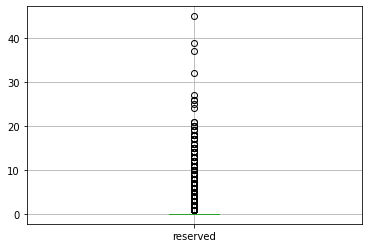

In [1029]:
usuarios_con_reserva.boxplot()

# Busqueda de Objetivo

## Relacion entre cantidad de dispositivos y reserva

In [1030]:
cantidad_de_dispositivos=web.groupby(web.user_id).agg(devices_used=('device_id','nunique'),reserved=('reserved','sum'))
cantidad_de_dispositivos

,devices_used,reserved
user_id,,
104,1,0.0
136,1,1.0
137,1,0.0
166,1,0.0
201,1,0.0
...,...,...
9756022,1,0.0
9759725,1,0.0
9776787,1,0.0


¿Tiene una relación positiva la cantidad de dispositivos usados y la reserva?¿Será que un usuario que quiere reservar,esta constantemente entrando a la pagina web, desde cualquier dispositivo que tenga cercano?

In [1031]:
cantidad_de_dispositivos.devices_used.unique()

array([ 1,  3,  2,  6,  7,  5, 11,  4,  8,  9], dtype=int64)

In [1032]:
cantidad_de_dispositivos.loc[cantidad_de_dispositivos.devices_used==11]

,devices_used,reserved
user_id,,
2066,11,0.0
6126706,11,0.0


aca vemos un usuario que ingreso con 11 dispositivos diferentes pero no reservo un auto.

In [1033]:
cantidad_de_dispositivos.loc[cantidad_de_dispositivos.devices_used==9]

,devices_used,reserved
user_id,,
4362580,9,0.0


lo mismo sucede con 9

In [1034]:
cantidad_de_dispositivos.loc[cantidad_de_dispositivos.reserved>0 ,'devices_used'].describe()

count    8863.000000
mean        1.717477
std         0.904399
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: devices_used, dtype: float64

In [1035]:
cantidad_de_dispositivos.loc[cantidad_de_dispositivos.reserved==0 ,'devices_used'].describe()

count    131221.000000
mean          1.104915
std           0.360302
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          11.000000
Name: devices_used, dtype: float64

Podemos ver que la media de dispositivos usados para usuarios que reservaron y para los que no es de 1 dispositivo. Sin embargo, el 75% de los usuarios que reservan usan dos dispositivos , mientras que los usuarios que no reservan, usan uno

¿cuales son los dispositivos mas usados?


In [1122]:
web.device_model.value_counts()

Series([], Name: device_model, dtype: int64)

In [1137]:
web['device_model'] = web['device_model'].apply(lambda x : "Apple" if x.startswith("I") or x == "mac"\
        else "SAMSUNG" if x.startswith("SM")\
        else  "motorola" if x.startswith("moto")
        else x)

In [1138]:
web.device_model.value_counts()

Android       127440
iPhone         32580
Windows        29646
Mac             6428
SAMSUNG         4968
               ...  
NX659J             1
A9 Pro             1
8094M              1
LYA-L29            1
Nubia 6010         1
Name: device_model, Length: 466, dtype: int64

## Usuarios que reservaron

In [1036]:
conversion= web.loc[web['reserved']== 1]

In [1037]:
tasa_de_conversion=web.groupby('mes_sesion').agg(cantidad_de_reservas=('reserved','sum'),
                                         cantidad_de_sessiones=('session_id','count'),)
tasa_de_conversion['porcentaje_de_reservas']=tasa_de_conversion.cantidad_de_reservas/tasa_de_conversion.cantidad_de_sessiones*100
tasa_de_conversion

,cantidad_de_reservas,cantidad_de_sessiones,porcentaje_de_reservas
mes_sesion,,,
1,3369.0,34064,9.890207
2,6249.0,70593,8.852152
3,5060.0,60024,8.429961
4,3485.0,49479,7.043392


Este groupby muestra la evolución de las reservas desde enero hasta abril. Voy a graficarlo para verlo el movimiento de la linea a lo largo de los meses

(hay usuarios que entraron al sitio por primera vez un  mes y reservaron  el siguiente mes)

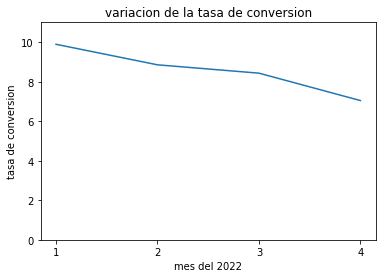

In [1038]:
tasa_de_conversion.porcentaje_de_reservas.plot.line( ylim = [0, 11])
plt.title('variacion de la tasa de conversion')
plt.xlabel('mes del 2022')
plt.ylabel('tasa de conversion')
plt.xticks([1,2,3,4])
plt.show()

## Relacion entre tiempo de pantalla y reserva

In [1039]:
tiempo_en_pantalla= web.groupby('user_id').agg(tiempo_total=('muinutes on screen','sum'),
                           reserva=('reserved','sum'))

In [1040]:
tiempo_en_pantalla

,tiempo_total,reserva
user_id,,
104,26.866667,0.0
136,90.316667,1.0
137,37.000000,0.0
166,122.850000,0.0
201,4.483333,0.0
...,...,...
9756022,3.283333,0.0
9759725,59068.466667,0.0
9776787,1.433333,0.0


Quiero ver si el tiempo en que un usuario esta navegando en el sitio web, tiene una correlación positiva con la tasa de reserva o no.

In [1041]:
def convirtio(x):
    if x > 0:
        return 1
    else:
        return 0
tiempo_en_pantalla['conversion']=tiempo_en_pantalla['reserva'].apply(convirtio)

In [1042]:
tiempo_en_pantalla

,tiempo_total,reserva,conversion
user_id,,,
104,26.866667,0.0,0
136,90.316667,1.0,1
137,37.000000,0.0,0
166,122.850000,0.0,0
201,4.483333,0.0,0
...,...,...,...
9756022,3.283333,0.0,0
9759725,59068.466667,0.0,0
9776787,1.433333,0.0,0


<AxesSubplot:xlabel='tiempo_total', ylabel='reserva'>

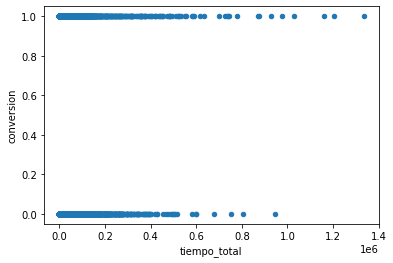

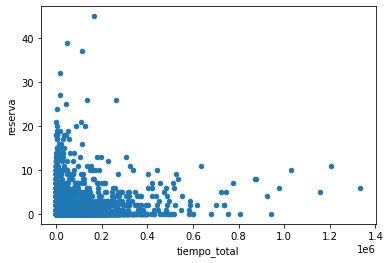

In [1043]:
tiempo_en_pantalla.plot.scatter(x='tiempo_total',y='conversion')
tiempo_en_pantalla.plot.scatter(x='tiempo_total',y='reserva')

In [1044]:
web.loc[:,['user_id','total_events','reserved']]

,user_id,total_events,reserved
51760,9015447,1,0.0
14885,8820027,9,0.0
3992,5510567,1,0.0
131349,8665203,9,0.0
25970,8409083,1,0.0
...,...,...,...
214144,5557797,132,0.0
214111,6220646,145,0.0
214150,5910763,235,1.0
214142,87114,184,0.0


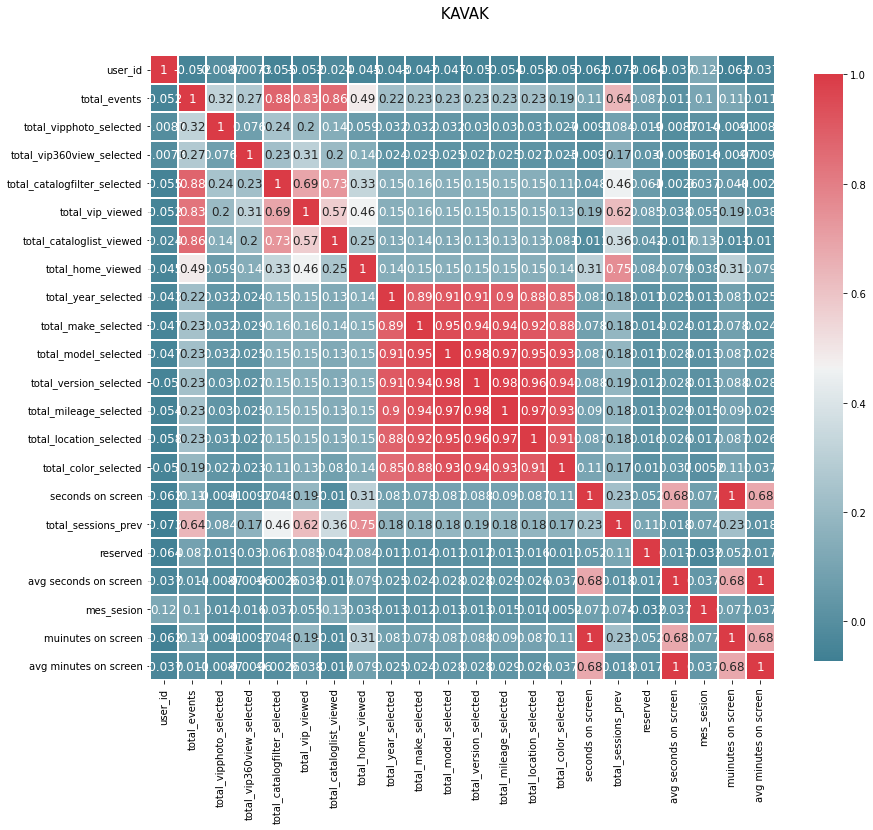

In [1045]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)

    _ = sns.heatmap(
        df.corr(),
        cmap = colormap,
        square=True,
        cbar_kws={'shrink':.9 },
        ax=ax,
        annot=True,
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )

    plt.title(' KAVAK', y=1.05, size=15)

correlation_heatmap(web)

# Outliers

In [1046]:
web.describe()

,user_id,total_events,total_vipphoto_selected,total_vip360view_selected,total_catalogfilter_selected,total_vip_viewed,total_cataloglist_viewed,total_home_viewed,total_year_selected,total_make_selected,...,total_mileage_selected,total_location_selected,total_color_selected,seconds on screen,total_sessions_prev,reserved,avg seconds on screen,mes_sesion,muinutes on screen,avg minutes on screen
count,2.141600e+05,214160.00000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,...,214160.000000,214160.000000,214160.000000,2.141600e+05,214160.000000,214160.00000,2.141600e+05,214160.000000,214160.000000,214160.000000
mean,7.249611e+06,136.05466,5.022619,0.549743,28.677615,25.250299,35.365283,4.779613,0.372913,0.376718,...,0.299220,0.262229,0.247086,8.518372e+04,6.660035,0.08481,9.131869e+03,2.583293,1419.728721,152.197821
std,2.521737e+06,406.15579,49.460406,5.033431,122.384672,81.485442,177.395937,22.261192,1.913053,1.884517,...,1.599664,1.538530,1.416469,6.172415e+05,14.556284,0.27860,9.233204e+04,1.011563,10287.358813,1538.867351
min,1.040000e+02,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.00000,0.000000e+00,1.000000,0.000000,0.000000
25%,5.262605e+06,12.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.920000e+02,2.000000,0.00000,7.350000e+01,2.000000,3.200000,1.225000
50%,8.741507e+06,36.00000,0.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.140000e+02,3.000000,0.00000,2.530000e+02,3.000000,15.233333,4.216667
75%,9.240933e+06,115.00000,0.000000,0.000000,18.000000,20.000000,14.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.426000e+03,6.000000,0.00000,6.207297e+02,3.000000,57.100000,10.345494
max,9.856417e+06,39953.00000,8286.000000,694.000000,11739.000000,6743.000000,21358.000000,2546.000000,320.000000,226.000000,...,211.000000,207.000000,213.000000,1.837662e+07,1361.000000,1.00000,5.648626e+06,4.000000,306276.933333,94143.758333


Se puede ver que hay una gran diferencia entre el cuartil 3 y el cuartil 4. Se puede pensar que los valores altos son errores del sistema o bots.Por lo tanto, voy a crear un dataframe filtado que no contenga outliers irreales.
Al haber una gran cantidad de columnas que necesitan un analisis de outliers , voy a crear una sección para cada una y analizarla antes y despues del filtrado de outlier.


In [1047]:
def valor_atipico(df,var):
   outlier=df[var].quantile(0.75) + 1.5 * (df[var].quantile(0.75) - df[var].quantile(0.25))
   return int(outlier)

Tenía la idea de usar esta formula de valor outlier pero como hay muchos eventos cuyo tercer quartil es 0, voy a analizar todos los eventos juntos y aparte del resto de las variables

##Eventos

In [1048]:
eventos=['total_cataloglist_viewed','total_catalogfilter_selected','total_home_viewed','total_vip360view_selected','total_color_selected','total_location_selected','total_make_selected','total_mileage_selected','total_version_selected','total_vip_viewed','total_vipphoto_selected','total_year_selected','total_model_selected']


In [1049]:
eventos_estadisticas=web[[*eventos]].describe()
eventos_estadisticas

,total_cataloglist_viewed,total_catalogfilter_selected,total_home_viewed,total_vip360view_selected,total_color_selected,total_location_selected,total_make_selected,total_mileage_selected,total_version_selected,total_vip_viewed,total_vipphoto_selected,total_year_selected,total_model_selected
count,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000
mean,35.365283,28.677615,4.779613,0.549743,0.247086,0.262229,0.376718,0.299220,0.324351,25.250299,5.022619,0.372913,0.339470
std,177.395937,122.384672,22.261192,5.033431,1.416469,1.538530,1.884517,1.599664,1.657433,81.485442,49.460406,1.913053,1.705465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
75%,14.000000,18.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000
max,21358.000000,11739.000000,2546.000000,694.000000,213.000000,207.000000,226.000000,211.000000,223.000000,6743.000000,8286.000000,320.000000,223.000000


In [1050]:
eventos_estadisticas.loc['75%'].max()

20.0

Siendo 20 el valor mas grande de un tercer cuartil , voy a tomarlo como maximo para todos los eventos.Aquellos eventos que superen 20 interacciones no van a ser tomados en cuenta para el modelo.

In [1051]:
web_x_outliers=web.copy()

El data frame "web_x_outliers va a ser el dataframe web sin outliers.

In [1052]:
for i in eventos:
    web_x_outliers=web_x_outliers.loc[web_x_outliers[i] <=20]


En el nuevo dataframe , los eventos tienen como valor maximo 20

In [1053]:
web_x_outliers.describe()

,user_id,total_events,total_vipphoto_selected,total_vip360view_selected,total_catalogfilter_selected,total_vip_viewed,total_cataloglist_viewed,total_home_viewed,total_year_selected,total_make_selected,...,total_mileage_selected,total_location_selected,total_color_selected,seconds on screen,total_sessions_prev,reserved,avg seconds on screen,mes_sesion,muinutes on screen,avg minutes on screen
count,1.335920e+05,133592.000000,133592.000000,133592.000000,133592.000000,133592.000000,133592.000000,133592.000000,133592.000000,133592.000000,...,133592.000000,133592.000000,133592.000000,1.335920e+05,133592.000000,133592.000000,1.335920e+05,133592.000000,133592.000000,133592.000000
mean,7.383556e+06,24.294703,0.217992,0.105283,1.996684,3.755494,1.874192,0.803416,0.213067,0.210589,...,0.164606,0.135046,0.141161,2.052985e+04,3.190550,0.061920,4.947781e+03,2.470769,342.164111,82.463011
std,2.455781e+06,30.091997,1.563175,0.520052,3.807985,4.633768,4.294831,1.865288,0.770356,0.798559,...,0.654614,0.595202,0.594002,2.803831e+05,3.076556,0.241011,7.720861e+04,1.027195,4673.052181,1286.810215
min,1.360000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,5.424992e+06,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.000000e+01,2.000000,0.000000,3.000000e+01,2.000000,1.166667,0.500000
50%,8.793162e+06,16.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.210000e+02,2.000000,0.000000,1.169583e+02,2.000000,5.350000,1.949306
75%,9.247061e+06,32.000000,0.000000,0.000000,2.000000,6.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.580000e+02,3.000000,0.000000,2.985000e+02,3.000000,15.966667,4.975000
max,9.856417e+06,832.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,18.000000,20.000000,1.129725e+07,68.000000,1.000000,5.648626e+06,4.000000,188287.516667,94143.758333


Ahora, analizo las variables que no son eventos por separado

##Total Events

<AxesSubplot:ylabel='total_events'>

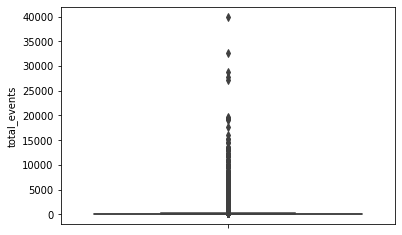

In [1054]:
sns.boxplot(data = web, y = 'total_events')

In [1055]:
web.total_events.value_counts()

2       10247
4        8089
1        5242
6        5133
8        4969
        ...  
3739        1
5057        1
2220        1
2935        1
5881        1
Name: total_events, Length: 2868, dtype: int64

In [1056]:
web_x_outliers= web_x_outliers.loc[web_x_outliers.total_events<valor_atipico(web,'total_events')]

 calcule el valor atípico de total_events y filtre el nuevo dataset

In [1057]:
web_x_outliers.total_events.describe()

count    133401.000000
mean         23.788105
std          26.611293
min           1.000000
25%           6.000000
50%          16.000000
75%          32.000000
max         268.000000
Name: total_events, dtype: float64

##Seconds on screen


<AxesSubplot:ylabel='seconds on screen'>

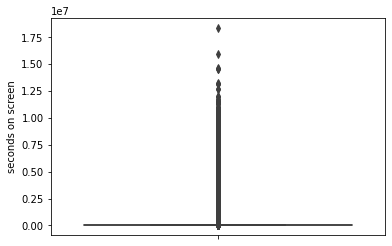

In [1058]:
sns.boxplot(data=web,y='seconds on screen')

In [1059]:
web_x_outliers['seconds on screen'].value_counts()

0.0         13133
1.0          3205
2.0          1456
3.0          1195
4.0           527
            ...  
47216.0         1
11751.0         1
11334.0         1
192659.0        1
87487.0         1
Name: seconds on screen, Length: 8921, dtype: int64

In [1060]:
web_x_outliers=web.loc[web['seconds on screen']<valor_atipico(web,'seconds on screen')]

In [1061]:
web_x_outliers['seconds on screen'].describe().round()

count    186227.0
mean       1427.0
std        1824.0
min           0.0
25%         145.0
50%         642.0
75%        2011.0
max        8276.0
Name: seconds on screen, dtype: float64

minutes on screen deriva de seconds on screen por lo que se ajusta aca tambien

##Average seconds on screen

<AxesSubplot:ylabel='avg seconds on screen'>

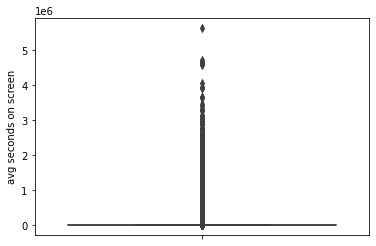

In [1062]:
sns.boxplot(data=web,y='avg seconds on screen')

In [1063]:
web['avg seconds on screen'].value_counts()

0.000000         13146
0.500000          3205
1.000000          1224
1.500000          1056
2.000000           491
                 ...  
958.176471           1
558.600000           1
1461.333333          1
905.771739           1
489033.090909        1
Name: avg seconds on screen, Length: 54486, dtype: int64

In [1064]:
web_x_outliers=web.loc[web['avg seconds on screen'] <valor_atipico(web,'seconds on screen')]

In [1065]:
web_x_outliers['avg seconds on screen'].describe()

count    206914.000000
mean        424.207962
std         608.779594
min           0.000000
25%          69.250000
50%         237.000000
75%         567.666667
max        8275.500000
Name: avg seconds on screen, dtype: float64

Lo mismo sucede con avg minutes on screen, que depende de avg seconds on screen

## Total sessions Prev

<AxesSubplot:ylabel='total_sessions_prev'>

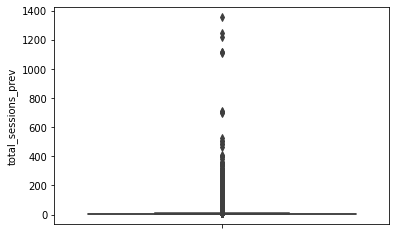

In [1066]:
sns.boxplot(data=web,y='total_sessions_prev')

In [1067]:
web_x_outliers=web.loc[web.total_sessions_prev<valor_atipico(web,'total_sessions_prev')]

In [1068]:
web_x_outliers.total_sessions_prev.describe()

count    188204.000000
mean          3.650868
std           2.345413
min           1.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          11.000000
Name: total_sessions_prev, dtype: float64

In [1069]:
print(f"Para el modelo, no se tendrán en cuenta {len(web)-len(web_x_outliers)} datos atípicos")

Para el modelo, no se tendrán en cuenta 25956 datos atípicos


#Escalado


In [1070]:
def data_dist(df,var):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].set_title(f"Distribucion de {var}")
    sns.histplot(data=df, x=f"{var}", kde=True, ax=ax[0])

    ax[1].set_title(f"Boxplot de{var}")
    sns.boxplot(data=df, x=f"{var}", ax=ax[1])

##Total Events

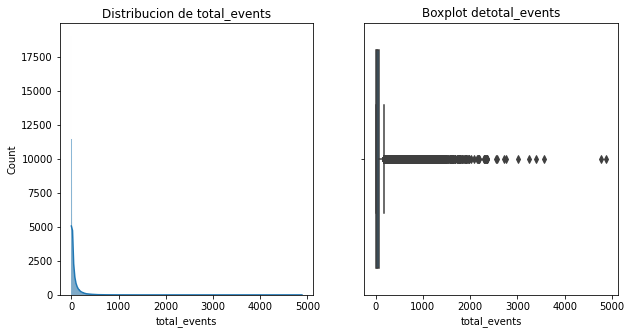

In [1071]:
data_dist(web_x_outliers,'total_events')

  ##Vipp Photo 

<AxesSubplot:ylabel='total_vipphoto_selected'>

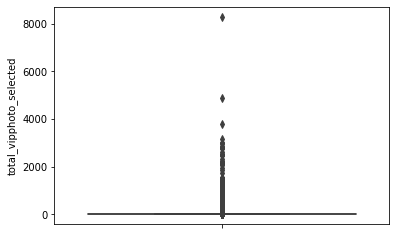

In [1072]:
sns.boxplot(data = web, y = 'total_vipphoto_selected')

In [1073]:
web.total_vipphoto_selected.value_counts()

0       193842
1         1487
2         1299
4          797
6          769
         ...  
354          1
1091         1
659          1
2116         1
811          1
Name: total_vipphoto_selected, Length: 636, dtype: int64

In [1074]:
web_x_outliers=web_x_outliers.loc[web_x_outliers.total_vipphoto_selected<20]

In [1075]:
web_x_outliers.total_vipphoto_selected.describe()

count    181615.000000
mean          0.387534
std           2.038985
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          19.000000
Name: total_vipphoto_selected, dtype: float64

##Total vip360 view selected

<AxesSubplot:ylabel='total_vip360view_selected'>

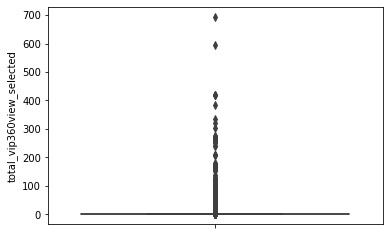

In [1076]:
sns.boxplot(data=web,y='total_vip360view_selected')

In [1077]:
web_x_outliers.total_vip360view_selected.value_counts()

0      162791
1        9396
2        5090
3        1166
4        1156
        ...  
89          1
65          1
126         1
64          1
99          1
Name: total_vip360view_selected, Length: 65, dtype: int64

In [1078]:
web_x_outliers=web_x_outliers.loc[web_x_outliers['total_vip360view_selected']<10]

In [1079]:
web_x_outliers.total_vip360view_selected.describe()

count    180929.000000
mean          0.200123
std           0.773101
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: total_vip360view_selected, dtype: float64

##total cataloglist viewed

<AxesSubplot:ylabel='total_cataloglist_viewed'>

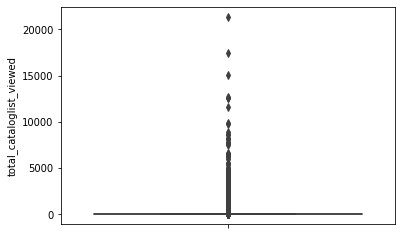

In [1080]:
sns.boxplot(data=web,y='total_cataloglist_viewed')

In [1081]:
web_x_outliers.total_cataloglist_viewed.value_counts()

0       114418
1         5699
2         3861
4         2462
3         2399
         ...  
946          1
564          1
1163         1
499          1
1431         1
Name: total_cataloglist_viewed, Length: 631, dtype: int64

In [1082]:
web_x_outliers=web_x_outliers[web_x_outliers.total_cataloglist_viewed<20]

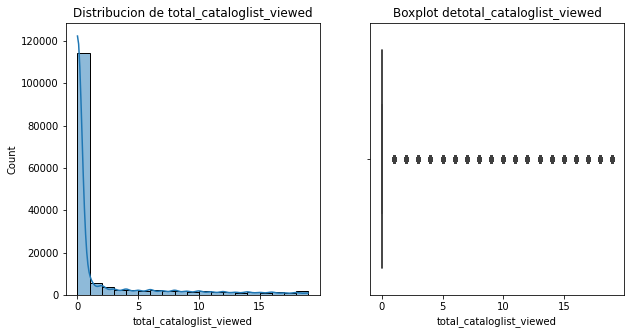

In [1083]:
data_dist(web_x_outliers,'total_cataloglist_viewed')

In [1084]:
df=web_x_outliers[web_x_outliers.total_cataloglist_viewed>1]

cree un df para ver como se distribuyen los datos de aquellos que si vieron el catalogo.

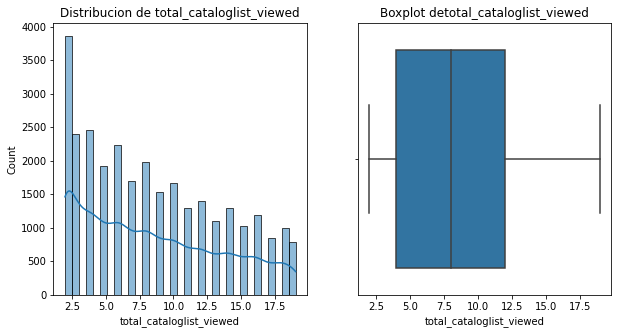

In [1085]:
data_dist(df,'total_cataloglist_viewed')

##total catalogfilter selected

<AxesSubplot:ylabel='total_catalogfilter_selected'>

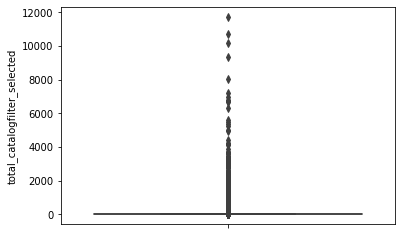

In [1086]:
sns.boxplot(data=web, y='total_catalogfilter_selected')

In [1087]:
web_x_outliers=web_x_outliers[web_x_outliers['total_catalogfilter_selected']<100]

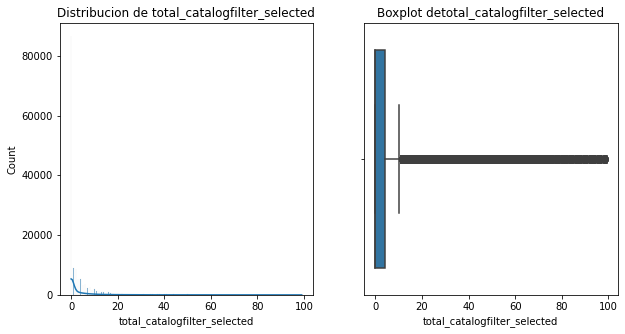

In [1088]:
data_dist(web_x_outliers,'total_catalogfilter_selected')

##total home viewed

<AxesSubplot:ylabel='total_home_viewed'>

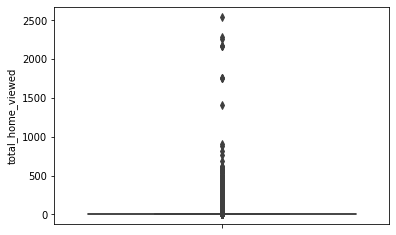

In [1089]:
sns.boxplot(data=web, y='total_home_viewed')

In [1090]:
web_x_outliers=web_x_outliers[web_x_outliers.total_home_viewed<50]

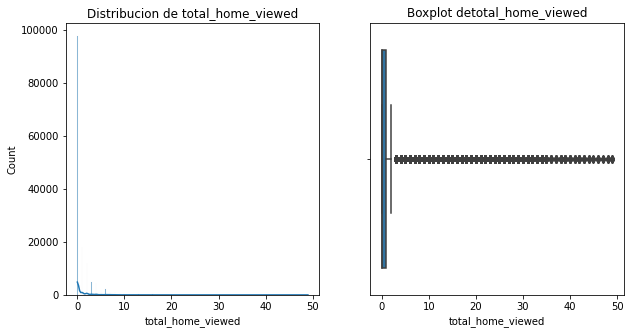

In [1091]:
data_dist(web_x_outliers,'total_home_viewed')

##total color selected

<AxesSubplot:ylabel='total_color_selected'>

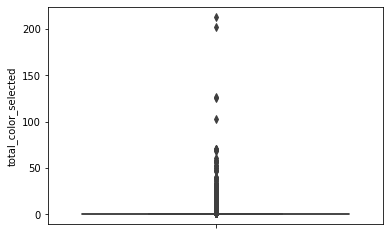

In [1092]:
sns.boxplot(data=web,y='total_color_selected')

In [1093]:
web.total_color_selected.value_counts()

0      190565
1       12120
2        6575
3        1619
4        1426
5         533
6         439
8         187
7         186
9          87
10         85
11         43
12         42
14         38
16         21
17         19
20         19
13         17
15         15
18         11
23         10
24          9
19          9
21          9
28          8
25          8
22          7
26          6
33          6
39          4
32          4
70          3
30          2
38          2
57          2
47          2
50          2
27          2
40          1
48          1
56          1
69          1
36          1
52          1
103         1
68          1
213         1
59          1
58          1
29          1
202         1
61          1
53          1
127         1
125         1
34          1
Name: total_color_selected, dtype: int64

In [1094]:
web_x_outliers=web_x_outliers[web_x_outliers.total_color_selected<7]

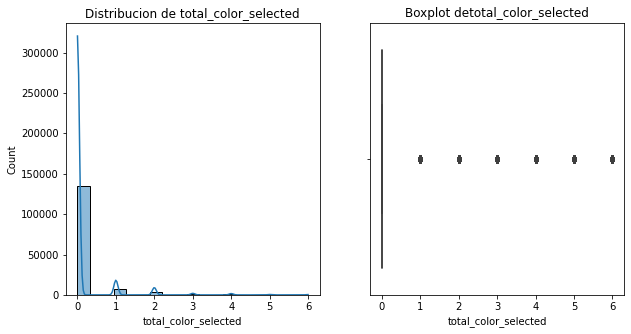

In [1095]:
data_dist(web_x_outliers,'total_color_selected')

 ##total location selected

<AxesSubplot:ylabel='total_location_selected'>

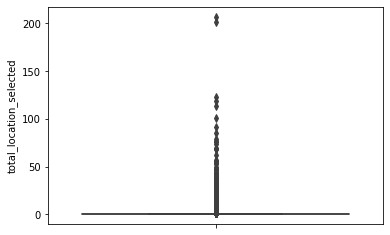

In [1096]:
sns.boxplot(data=web,y='total_location_selected')

In [1097]:
web.total_location_selected.value_counts()

0      190538
1       11813
2        6431
3        1763
4        1497
        ...  
202         1
53          1
37          1
92          1
79          1
Name: total_location_selected, Length: 69, dtype: int64

In [1098]:
 print(f" hay un {web.loc[web.total_location_selected>30]['total_location_selected'].count()/len(web)*100}% que se encuentra arriba de {30} que voy a tomar como limite")

 hay un 0.02708255509899141% que se encuentra arriba de 30 que voy a tomar como limite


In [1099]:
web_x_outliers=web_x_outliers[web_x_outliers.total_location_selected<30]

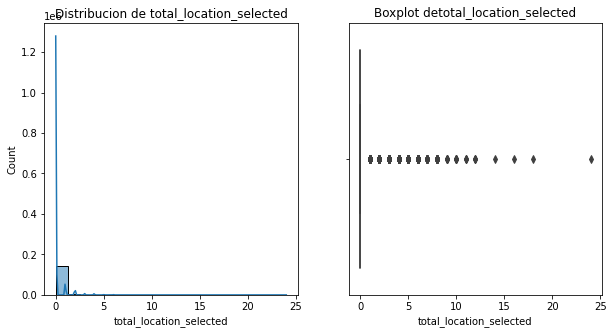

In [1100]:
data_dist(web_x_outliers,'total_location_selected')

##total make selected

<AxesSubplot:ylabel='total_make_selected'>

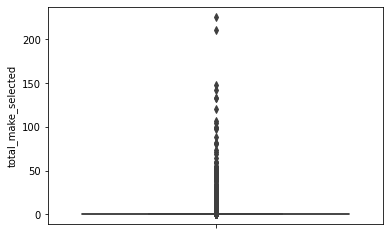

In [1101]:
sns.boxplot(data=web, y='total_make_selected')

In [1102]:
web.total_make_selected.value_counts()

0      182519
1       15085
2        8218
3        2652
4        2214
        ...  
98          1
33          1
74          1
211         1
46          1
Name: total_make_selected, Length: 72, dtype: int64

In [1103]:
web_x_outliers=web_x_outliers[web_x_outliers.total_make_selected<20]

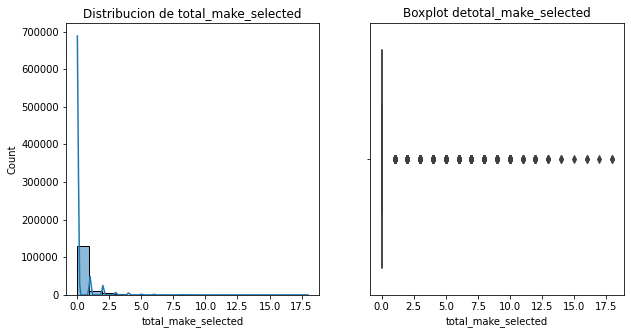

In [1104]:
data_dist(web_x_outliers,'total_make_selected')

##total mileage selected

<AxesSubplot:ylabel='total_mileage_selected'>

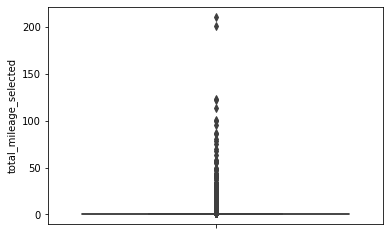

In [1105]:
sns.boxplot(data=web,y='total_mileage_selected')

In [1106]:
web.total_mileage_selected

51760     0
14885     0
3992      0
131349    0
25970     0
         ..
214144    0
214111    0
214150    1
214142    3
214156    0
Name: total_mileage_selected, Length: 214160, dtype: int64